In [1]:
import os, sys
import xarray as xa
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pylibs.plot_utils import set_size, setupax_2dmap

In [2]:
#iodafile = '/glade/derecho/scratch/swei/Dataset/input/obs/oci_pace_aod/oci_pace_aod.2024110106.nc4'
# iodafile = '/glade/work/swei/Git/JEDI-METplus/workdir/Data/input/obs/pace_aod/obs.pace_aod.2024110406.nc4'
obsname = 'aeronet_aod'
iodafile = f'/glade/work/swei/Git/JEDI-METplus/output/aodobs_merra2/hofx/f00/{obsname}/hofx.{obsname}.2024110100.nc4'
# iodafile = '/glade/derecho/scratch/swei/data_process_tmp/pace_spexone/spexone_test.nc'
pltgrp = 'ObsValue'
pltvar = 'aerosolOpticalDepth'
pltch = 4
# pltsavedir = f'/glade/work/swei/Git/JEDI-METplus/output/aodobs_merra2_2/plots/f00/{obsname}'
# pltname = f'{pltgrp}.{obsname}.2024110106.png'
# if not os.path.exists(pltsavedir):
#     os.makedirs(pltsavedir)

In [3]:
dims_ds = xa.open_dataset(iodafile, engine='netcdf4')
channel = dims_ds.Channel.values
meta_ds = xa.open_dataset(iodafile, group='MetaData').assign_coords(Channel=channel.astype(np.int32))
plotting_ds = xa.open_dataset(iodafile, group=pltgrp).assign_coords(Channel=channel.astype(np.int32))

In [4]:
pltdata = plotting_ds[pltvar].sel(Channel=pltch).data

In [18]:
dims_ds.Location

<xarray.DataArray 'Location' (Location: 333)> Size: 3kB
array([  0., 128., 256., ..., 254., 127., 255.])
Coordinates:
  * Location  (Location) float64 3kB 0.0 128.0 256.0 1.0 ... 254.0 127.0 255.0

In [11]:
pltdata = meta_ds.surfaceQualifier.data

In [5]:
lats = meta_ds.latitude.data
lons = meta_ds.longitude.data
# water_mask = meta_ds.surfaceQualifier.data ==

In [6]:
# area corner [lats.min(), lats.max(), lons.min(), lons.max()]
# area_corner = [-90., 90., -150., 0.] # original cut
# area_corner = [15., 16., -26., -25.] # EAtl
# area_corner = [-40., 10., -90., -30.] # SAmer
# area_corner = [20., 60., -130., -50.] # NAmer
area_corner = [-90., 90., -180., 180.]
area_corner = [lats.min()-1., lats.max()+1, lons.min()-1, lons.max()+1]
area_mask = (lats > area_corner[0])&(lats < area_corner[1])&(lons > area_corner[2])&(lons < area_corner[3])
area = None

In [7]:
proj = ccrs.PlateCarree()

In [8]:
data_dict = {'pltdata': (['locs'], pltdata), 'lat': (['locs'], lats), 'lon': (['locs'], lons)}
coord_dict = {'locs': range(pltdata.size)}
pltds = xa.Dataset(data_dict, coords=coord_dict)

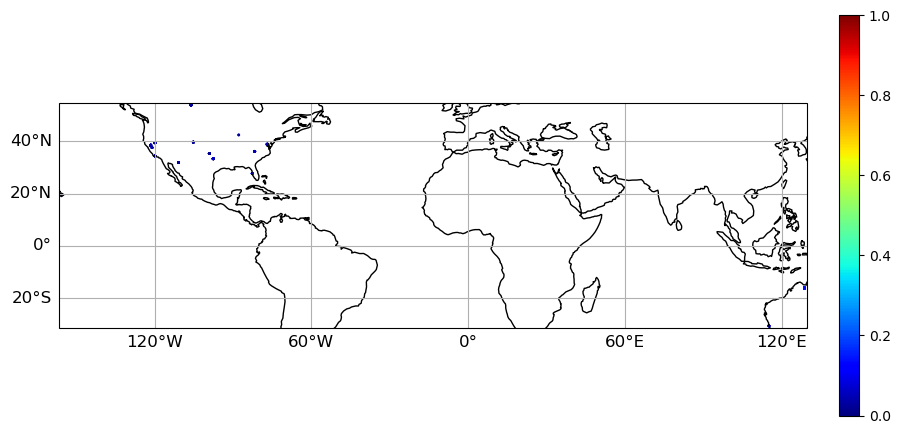

In [9]:
fig, ax, gl = setupax_2dmap(area_corner, area, proj, lbsize=12)
set_size(8, 5)
sc = ax.scatter(pltds.lon[area_mask], pltds.lat[area_mask], c=pltds.pltdata[area_mask], s=1, vmin=0., vmax=1, cmap='jet')
plt.colorbar(sc, fraction=0.025, pad=0.04, aspect=20)

In [81]:
fig.savefig(pltsavedir + '/' + pltname, dpi=600)